### Data cleaning:  IMDB- title.crew
The following codes merges director names in imdb.name.basics and director ids in imdb.title.crew 

Name of clean datasets: 
"df_directors_wide" and "df_directors_long"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Step 1: Clearning imdb.title.crew

In [3]:
# Read original data
df_title_crew = pd.read_csv('Data/zippedData/imdb.title.crew.csv.gz')
df_title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [4]:
df_title_crew.sample(5)

,tconst,directors,writers
5978,tt8717602,nm4257015,nm4257015
121193,tt10395036,nm10090197,nm10090197
83822,tt6151048,nm1653266,nm3184770
36515,tt10209956,"nm0080387,nm0837788",nm0080387
88312,tt3989306,nm2790942,nm2790942


In [13]:
# Make a copy of the original dataset
df_crew= df_title_crew.copy()

# Delete 'writers' 
df_crew.drop(['writers'], axis=1, inplace=True)

# Drop missing values in 'directors'
df_crew.dropna(axis=0, subset=['directors'], inplace=True)

# Drop duplicate in 'tconst', film id
df_crew.drop_duplicates(subset='tconst', inplace=True)

df_crew.head()

,tconst,directors
0,tt0285252,nm0899854
2,tt0462036,nm1940585
3,tt0835418,nm0151540
4,tt0878654,"nm0089502,nm2291498,nm2292011"
5,tt0879859,nm2416460


In [18]:
df_dir = df_crew.assign(director = df_crew.directors.str.split(',')).explode('director')

In [22]:
df_dir.drop('directors', axis = 1, inplace=True)
df_dir

,tconst,director
0,tt0285252,nm0899854
2,tt0462036,nm1940585
3,tt0835418,nm0151540
4,tt0878654,nm0089502
4,tt0878654,nm2291498
...,...,...
146139,tt8999974,nm10122357
146140,tt9001390,nm6711477
146141,tt9001494,nm10123242
146141,tt9001494,nm10123248


In [23]:

df_merge_test = df_dir.merge(df_name2, how='inner', left_on='director', right_on='nconst' )

# Rename
#df_merge1.rename(columns={'primary_name':'director_name1'}, inplace=True)

# drop keys
#df_merge1.drop(axis=1, columns='nconst', inplace=True)

#df_merge1.head(2)

In [40]:
df_merge_test.sort_values(by = 'tconst').head(20)

,tconst,director,nconst,primary_name
141965,tt0063540,nm0712540,nm0712540,Harnam Singh Rawail
113056,tt0066787,nm0002411,nm0002411,Mani Kaul
66852,tt0069049,nm0000080,nm0000080,Orson Welles
11571,tt0069204,nm0611531,nm0611531,Hrishikesh Mukherjee
92562,tt0100275,nm0749914,nm0749914,Raoul Ruiz
1140,tt0100275,nm0765384,nm0765384,Valeria Sarmiento
50249,tt0111414,nm0398271,nm0398271,Frank Howson
159047,tt0112502,nm6883878,nm6883878,Mc Jones
110778,tt0137204,nm0365480,nm0365480,Anthony Harrison
143666,tt0139613,nm0023406,nm0023406,José Manuel Alves Pereira


In [37]:
df_new = df_merge_test.groupby('tconst').agg({'primary_name': lambda x: x.tolist()}).reset_index()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140416 entries, 0 to 140415
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   tconst        140416 non-null  object
 1   primary_name  140416 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


In [38]:
df_new.head()

,tconst,primary_name
0,tt0063540,[Harnam Singh Rawail]
1,tt0066787,[Mani Kaul]
2,tt0069049,[Orson Welles]
3,tt0069204,[Hrishikesh Mukherjee]
4,tt0100275,"[Valeria Sarmiento, Raoul Ruiz]"


In [6]:
# Count how many directors in each cell. 

# Create a new data frame with split directors columns 
directors = df_crew['directors'].str.split(',', expand =True)
 
directors.info()

# Most films has only one or two directors. 
# For this project, drop films with 4 or more directors

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140417 entries, 0 to 146142
Data columns (total 83 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       140417 non-null  object
 1   1       15727 non-null   object
 2   2       2501 non-null    object
 3   3       1090 non-null    object
 4   4       710 non-null     object
 5   5       517 non-null     object
 6   6       401 non-null     object
 7   7       321 non-null     object
 8   8       258 non-null     object
 9   9       206 non-null     object
 10  10      139 non-null     object
 11  11      112 non-null     object
 12  12      92 non-null      object
 13  13      77 non-null      object
 14  14      69 non-null      object
 15  15      65 non-null      object
 16  16      60 non-null      object
 17  17      58 non-null      object
 18  18      53 non-null      object
 19  19      50 non-null      object
 20  20      43 non-null      object
 21  21      39 non-null      object
 

In [7]:
# Drop films with 4 or more directors 

# Step 1 - split directors into director1, director2, director3, director4 
# 'director4' has 4th and above directors
df_crew[['director1', 'director2', 'director3', 'director4']] = df_crew['directors'].str.split(',', n=3,  expand =True)

# Step 2 - drop rows which 'director4' is not null.
df_crew.dropna(axis=0, subset=['director4'])

# Step 3 - drop 'directors' and 'director4' columns. 
df_crew.drop(['directors', 'director4'], axis=1, inplace=True)

df_crew.sample(20)


,tconst,director1,director2,director3
82761,tt2783294,nm3069788,None,None
100070,tt4181658,nm3304716,None,None
8097,tt5664104,nm7613084,None,None
132254,tt5124206,nm7413335,None,None
116320,tt10363812,nm2664179,None,None
14626,tt7520618,nm6561619,None,None
92909,tt3788098,nm0752244,None,None
54902,tt2586000,nm3885065,None,None
73947,tt5963592,nm8359800,None,None
2362,tt2062989,nm1978110,nm0775688,None


### Step 2: Clearning imdb.name.basics

In [9]:
df_name = pd.read_csv('Data/zippedData/imdb.name.basics.csv.gz')
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [10]:
df_name.sample(5)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
237314,nm4331512,Ben Ryan Metzger,NaN,NaN,actor,"tt1995489,tt1948618,tt2400654,tt3685742"
494218,nm9493808,Mehdi Darlis,NaN,NaN,"producer,assistant_director,director","tt7761710,tt8760714"
182009,nm2576610,Trevor Beattie,1958.0,NaN,producer,"tt5114840,tt1464763,tt10133654,tt1182345"
324662,nm6113425,Michael Wallen,NaN,NaN,producer,tt3328366
597235,nm9355530,Chee Keat Lim,NaN,NaN,NaN,tt7530454


In [11]:
# Keep 'nconst', 'primary_name'
df_name2 = df_name[['nconst', 'primary_name' ]]

df_name2

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter
...,...,...
606643,nm9990381,Susan Grobes
606644,nm9990690,Joo Yeon So
606645,nm9991320,Madeline Smith
606646,nm9991786,Michelle Modigliani


### Step 3: Merge director ids (in df_crew) and director names (in df_name2)

In [11]:
# Merge names of directors for director1, and rename it director_name1  

df_merge1 = df_crew.merge(df_name2, how='left', left_on='director1', right_on='nconst' )

# Rename
df_merge1.rename(columns={'primary_name':'director_name1'}, inplace=True)

# drop keys
df_merge1.drop(axis=1, columns='nconst', inplace=True)

df_merge1.head(2)


,tconst,director1,director2,director3,director_name1
0,tt0285252,nm0899854,None,None,Tony Vitale
1,tt0462036,nm1940585,None,None,Bill Haley


In [12]:
# Merge names of directors for director2, and rename it director_name2  
df_merge2 = df_merge1.merge(df_name2, how='left', left_on='director2', right_on='nconst' )

# Rename
df_merge2.rename(columns={'primary_name':'director_name2'}, inplace=True)

# drop keys
df_merge2.drop(axis=1, columns='nconst', inplace=True)

df_merge2.head(2)

,tconst,director1,director2,director3,director_name1,director_name2
0,tt0285252,nm0899854,None,None,Tony Vitale,NaN
1,tt0462036,nm1940585,None,None,Bill Haley,NaN


In [13]:
# Merge names of directors for director3, and rename it director_name3

df_merge3 = df_merge2.merge(df_name2, how='left', left_on='director2', right_on='nconst' )

# Rename
df_merge3.rename(columns={'primary_name':'director_name3'}, inplace=True)

# drop keys
df_merge3.drop(axis=1, columns='nconst', inplace=True)

df_merge3.head(2)

,tconst,director1,director2,director3,director_name1,director_name2,director_name3
0,tt0285252,nm0899854,None,None,Tony Vitale,NaN,NaN
1,tt0462036,nm1940585,None,None,Bill Haley,NaN,NaN


### Clean dataset in a wide format

In [14]:
df_directors_wide = df_merge3
df_directors_wide.head(3)

,tconst,director1,director2,director3,director_name1,director_name2,director_name3
0,tt0285252,nm0899854,None,None,Tony Vitale,NaN,NaN
1,tt0462036,nm1940585,None,None,Bill Haley,NaN,NaN
2,tt0835418,nm0151540,None,None,Jay Chandrasekhar,NaN,NaN


### Reshape from wide to long format

In [15]:
## reshape wide to long format 
df_directors_long = pd.wide_to_long(df_directors_wide, ["director", "director_name"], i='tconst', j='n_th_director' )


# Drop NaN in 'director'
df_directors_long.dropna(axis=0, subset=['director'], inplace=True)

df_directors_long.reset_index(inplace=True)

# Delete 'n_th_director' 

df_directors_long.drop('n_th_director', axis=1, inplace=True)

### Clean dataset in a long format

In [16]:
df_directors_long.head()

,tconst,director,director_name
0,tt0285252,nm0899854,Tony Vitale
1,tt0462036,nm1940585,Bill Haley
2,tt0835418,nm0151540,Jay Chandrasekhar
3,tt0878654,nm0089502,Albert Pyun
4,tt0879859,nm2416460,Eric Manchester


In [17]:
#number of films shot by directors 

df_directors_long['director_name'].value_counts()[:20]


Omer Pasha             62
Larry Rosen            51
Rajiv Chilaka          50
Stephan Düfel          48
Graeme Duane           45
Gérard Courant         44
Claudio Costa          42
Nayato Fio Nuala       41
Eckhart Schmidt        37
Sergey A.              36
Tetsuya Takehora       33
Michael Fredianelli    32
Charlie Minn           30
Dustin Ferguson        29
Paul T.T. Easter       28
Philip Gardiner        27
Manny Velazquez        27
William Winckler       27
Yoshikazu Katô         27
David DeCoteau         26
Name: director_name, dtype: int64

### Merging mdb.title.ratings

In [18]:
df_title_rating = pd.read_csv('Data/zippedData/imdb.title.ratings.csv.gz')
df_title_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [19]:
# drop 'numvotes'
df_title_rating.drop(axis=1, columns = 'numvotes', inplace=True)


In [20]:
# Merge imdb.title.ratings and emiko's df_directors_wide 

df_directors_ratings = df_title_rating.merge(df_directors_wide, how='inner', on='tconst' )


In [21]:
df_directors_ratings.head(3)

,tconst,averagerating,director1,director2,director3,director_name1,director_name2,director_name3
0,tt10356526,8.3,nm8353804,None,None,Sukh Sanghera,NaN,NaN
1,tt10384606,8.9,nm9932562,nm9250842,None,George Llewelyn-John,Caolan Robertson,Caolan Robertson
2,tt1042974,6.4,nm1915232,None,None,Marcel Grant,NaN,NaN


### Merge Piotr data to df_directors_ratings

In [22]:
df_title_basic = pd.read_csv('Data/zippedData/imdb.title.basics.csv.gz')
df_title_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [23]:
df_title_basic

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [24]:
df_title_basic.dropna(inplace = True)

In [25]:
df_title_basic

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [26]:
df_year = df_title_basic[df_title_basic["start_year"] >= 2010]  

In [27]:
df_year = df_title_basic[df_title_basic["start_year"] <= 2021]  

In [28]:
df_year["start_year"].value_counts()

2016    13253
2017    13240
2015    12965
2014    12693
2013    12070
2018    12055
2012    11180
2011    10462
2010     9793
2019     4433
2020       81
2021        4
Name: start_year, dtype: int64

In [29]:
df_year.drop("primary_title", axis=1, inplace=True)

C:\Users\danie\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
df_year

,tconst,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...
146134,tt9916160,Drømmeland,2019,72.0,Documentary
146135,tt9916170,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,2019,90.0,"Drama,Thriller"


In [31]:
# Merge piotr's df_year and emiko's df_directors_wide 

df_imdb = df_year.merge(df_directors_ratings, how='inner', on='tconst' )


In [32]:
df_imdb.head()

,tconst,original_title,start_year,runtime_minutes,genres,averagerating,director1,director2,director3,director_name1,director_name2,director_name3
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,nm0712540,None,None,Harnam Singh Rawail,NaN,NaN
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,nm0002411,None,None,Mani Kaul,NaN,NaN
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,nm0000080,None,None,Orson Welles,NaN,NaN
3,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,nm0765384,nm0749914,None,Valeria Sarmiento,Raoul Ruiz,Raoul Ruiz
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,nm0365480,None,None,Anthony Harrison,NaN,NaN


In [33]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65305 entries, 0 to 65304
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           65305 non-null  object 
 1   original_title   65305 non-null  object 
 2   start_year       65305 non-null  int64  
 3   runtime_minutes  65305 non-null  float64
 4   genres           65305 non-null  object 
 5   averagerating    65305 non-null  float64
 6   director1        65305 non-null  object 
 7   director2        7256 non-null   object 
 8   director3        1195 non-null   object 
 9   director_name1   65304 non-null  object 
 10  director_name2   7256 non-null   object 
 11  director_name3   7256 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 6.5+ MB


In [34]:
df_num = pd.read_csv('Data/zippedData/tn.movie_budgets.csv.gz')
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [35]:
def data_cleaning_money(column_name):
    df_num[column_name] = df_num[column_name].str.replace('$', '').str.replace(',', '').astype(float)

In [36]:
data_cleaning_money('production_budget')
data_cleaning_money('domestic_gross')
data_cleaning_money('worldwide_gross')
df_num['release_date'] = pd.to_datetime(df_num['release_date'])
df_num_cleaned = df_num.drop(columns = 'id')

In [37]:
df_num_good = df_num_cleaned[df_num_cleaned['domestic_gross'] != 0.0]
df_num_good = df_num_good[df_num_good['worldwide_gross'] != 0.0]
df_num_good = df_num_good[df_num_good['production_budget'] != 0.0]
df_num_good = df_num_good[df_num_good['domestic_gross'] != df_num_good['worldwide_gross']]

In [38]:
df_num_good['ROI'] = (df_num_good['worldwide_gross'] - df_num_good['production_budget']) / df_num_good['production_budget']
df_num_final = df_num_good.sort_values(by = 'ROI', ascending = False)
df_num_final.drop(df_num_final[df_num_final['release_date'] < pd.Timestamp(2010, 1, 1)].index, inplace = True)
df_num_final['profit'] = (df_num_final['worldwide_gross'] - df_num_final['production_budget'])
df_num_final['month'] = df_num_final['release_date'].dt.month

In [39]:
df_num_final

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,profit,month
5679,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,415.564740,41556474.0,7
5211,2012-01-06,The Devil Inside,1000000.0,53262945.0,101759490.0,100.759490,100759490.0,1
5062,2011-04-01,Insidious,1500000.0,54009150.0,99870886.0,65.580591,98370886.0,4
5213,2015-04-17,Unfriended,1000000.0,32789645.0,64364198.0,63.364198,63364198.0,4
4664,2010-10-20,Paranormal Activity 2,3000000.0,84752907.0,177512032.0,58.170677,174512032.0,10
...,...,...,...,...,...,...,...,...
4059,2015-01-30,Trudno byt bogom,7000000.0,31443.0,41038.0,-0.994137,-6958962.0,1
2318,2010-06-30,Love Ranch,25000000.0,137885.0,146149.0,-0.994154,-24853851.0,6
2005,2015-06-05,United Passions,30000000.0,918.0,168832.0,-0.994372,-29831168.0,6
4970,2010-06-11,Jerusalema,2000000.0,7294.0,10679.0,-0.994660,-1989321.0,6


In [40]:
df_merge = df_num_final.merge(df_imdb, how = 'inner', left_on = 'movie', right_on = 'original_title')

In [41]:
df_merge

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,profit,month,tconst,original_title,start_year,runtime_minutes,genres,averagerating,director1,director2,director3,director_name1,director_name2,director_name3
0,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,415.564740,41556474.0,7,tt2309260,The Gallows,2015,81.0,"Horror,Mystery,Thriller",4.2,nm4000389,nm3951039,None,Travis Cluff,Chris Lofing,Chris Lofing
1,2012-01-06,The Devil Inside,1000000.0,53262945.0,101759490.0,100.759490,100759490.0,1,tt1560985,The Devil Inside,2012,83.0,Horror,4.2,nm0068587,None,None,William Brent Bell,NaN,NaN
2,2011-04-01,Insidious,1500000.0,54009150.0,99870886.0,65.580591,98370886.0,4,tt1591095,Insidious,2010,103.0,"Horror,Mystery,Thriller",6.9,nm1490123,None,None,James Wan,NaN,NaN
3,2015-04-17,Unfriended,1000000.0,32789645.0,64364198.0,63.364198,63364198.0,4,tt3713166,Unfriended,2014,83.0,"Horror,Mystery,Thriller",5.6,nm0300174,None,None,Levan Gabriadze,NaN,NaN
4,2010-10-20,Paranormal Activity 2,3000000.0,84752907.0,177512032.0,58.170677,174512032.0,10,tt1536044,Paranormal Activity 2,2010,91.0,Horror,5.7,nm0931095,None,None,Tod Williams,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,2012-11-02,Vamps,16000000.0,3361.0,94812.0,-0.994074,-15905188.0,11,tt1545106,Vamps,2012,92.0,"Comedy,Horror,Romance",5.2,nm0002132,None,None,Amy Heckerling,NaN,NaN
1605,2012-11-02,Vamps,16000000.0,3361.0,94812.0,-0.994074,-15905188.0,11,tt1719676,Vamps,2010,89.0,"Comedy,Horror,Thriller",4.5,nm1209639,None,None,Marcus Dreeke,NaN,NaN
1606,2015-01-30,Trudno byt bogom,7000000.0,31443.0,41038.0,-0.994137,-6958962.0,1,tt2328813,Trudno byt bogom,2013,177.0,"Drama,Sci-Fi",6.7,nm0314516,None,None,Aleksey German,NaN,NaN
1607,2010-06-30,Love Ranch,25000000.0,137885.0,146149.0,-0.994154,-24853851.0,6,tt1125929,Love Ranch,2010,117.0,"Biography,Comedy,Drama",5.6,nm0000431,None,None,Taylor Hackford,NaN,NaN


In [42]:
df_merge.drop('original_title', axis = 1, inplace = True)

In [43]:
df_dubplicates = df_merge[df_merge.duplicated('movie')]

In [44]:
df_dubplicates

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,profit,month,tconst,start_year,runtime_minutes,genres,averagerating,director1,director2,director3,director_name1,director_name2,director_name3
6,2017-01-20,Split,5000000.0,138141585.0,278964806.0,54.792961,273964806.0,1,tt3315656,2016,127.0,"Drama,Fantasy",3.6,nm1380487,None,None,Deborah Kampmeier,NaN,NaN
7,2017-01-20,Split,5000000.0,138141585.0,278964806.0,54.792961,273964806.0,1,tt4972582,2016,117.0,"Horror,Thriller",7.3,nm0796117,None,None,M. Night Shyamalan,NaN,NaN
8,2017-01-20,Split,5000000.0,138141585.0,278964806.0,54.792961,273964806.0,1,tt5495666,2016,80.0,Drama,7.0,nm4197711,None,None,Lawrence Côté-Collins,NaN,NaN
9,2017-01-20,Split,5000000.0,138141585.0,278964806.0,54.792961,273964806.0,1,tt6147768,2016,123.0,"Action,Drama,Sport",5.4,nm8509498,None,None,Kook-Hee Choi,NaN,NaN
24,2018-04-13,Truth or Dare,3500000.0,41411015.0,95127344.0,26.179241,91627344.0,4,tt2125681,2013,85.0,"Horror,Romance,Thriller",6.0,nm1491669,None,None,Tom Boyle,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,2011-09-16,3,7200000.0,59774.0,295492.0,-0.958959,-6904508.0,9,tt2123129,2012,145.0,"Drama,Mystery,Romance",7.2,nm1957070,None,None,Aishwarya Dhanush,NaN,NaN
1585,2011-09-16,3,7200000.0,59774.0,295492.0,-0.958959,-6904508.0,9,tt2379653,2012,115.0,"Comedy,Drama",6.1,nm0831526,None,None,Pablo Stoll,NaN,NaN
1586,2011-09-16,3,7200000.0,59774.0,295492.0,-0.958959,-6904508.0,9,tt5618160,2018,80.0,"Horror,Mystery,Thriller",3.9,nm4840973,None,None,Lou Simon,NaN,NaN
1593,2014-12-26,Barbecue,10000000.0,388.0,247565.0,-0.975244,-9752435.0,12,tt6090268,2017,102.0,Documentary,6.5,nm3268319,None,None,Matthew Salleh,NaN,NaN


In [45]:
df_merge.drop_duplicates(subset = ['movie'])

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,profit,month,tconst,start_year,runtime_minutes,genres,averagerating,director1,director2,director3,director_name1,director_name2,director_name3
0,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,415.564740,41556474.0,7,tt2309260,2015,81.0,"Horror,Mystery,Thriller",4.2,nm4000389,nm3951039,None,Travis Cluff,Chris Lofing,Chris Lofing
1,2012-01-06,The Devil Inside,1000000.0,53262945.0,101759490.0,100.759490,100759490.0,1,tt1560985,2012,83.0,Horror,4.2,nm0068587,None,None,William Brent Bell,NaN,NaN
2,2011-04-01,Insidious,1500000.0,54009150.0,99870886.0,65.580591,98370886.0,4,tt1591095,2010,103.0,"Horror,Mystery,Thriller",6.9,nm1490123,None,None,James Wan,NaN,NaN
3,2015-04-17,Unfriended,1000000.0,32789645.0,64364198.0,63.364198,63364198.0,4,tt3713166,2014,83.0,"Horror,Mystery,Thriller",5.6,nm0300174,None,None,Levan Gabriadze,NaN,NaN
4,2010-10-20,Paranormal Activity 2,3000000.0,84752907.0,177512032.0,58.170677,174512032.0,10,tt1536044,2010,91.0,Horror,5.7,nm0931095,None,None,Tod Williams,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,2011-08-19,5 Days of War,12000000.0,17479.0,87793.0,-0.992684,-11912207.0,8,tt1486193,2011,113.0,"Action,Drama,War",5.6,nm0001317,None,None,Renny Harlin,NaN,NaN
1604,2012-11-02,Vamps,16000000.0,3361.0,94812.0,-0.994074,-15905188.0,11,tt1545106,2012,92.0,"Comedy,Horror,Romance",5.2,nm0002132,None,None,Amy Heckerling,NaN,NaN
1606,2015-01-30,Trudno byt bogom,7000000.0,31443.0,41038.0,-0.994137,-6958962.0,1,tt2328813,2013,177.0,"Drama,Sci-Fi",6.7,nm0314516,None,None,Aleksey German,NaN,NaN
1607,2010-06-30,Love Ranch,25000000.0,137885.0,146149.0,-0.994154,-24853851.0,6,tt1125929,2010,117.0,"Biography,Comedy,Drama",5.6,nm0000431,None,None,Taylor Hackford,NaN,NaN


In [46]:
df_merge['genres'].value_counts()[:20]

Drama                         84
Adventure,Animation,Comedy    68
Comedy,Drama,Romance          57
Comedy,Drama                  57
Comedy                        51
Action,Adventure,Sci-Fi       50
Documentary                   40
Drama,Romance                 40
Comedy,Romance                40
Action,Crime,Drama            37
Action,Adventure,Fantasy      34
Horror,Mystery,Thriller       33
Action,Comedy,Crime           29
Horror,Thriller               28
Action,Adventure,Drama        27
Drama,Thriller                26
Biography,Drama,History       24
Action,Crime,Thriller         23
Action,Adventure,Comedy       22
Crime,Drama,Thriller          22
Name: genres, dtype: int64

In [47]:
df_merge.drop('director1', axis = 1, inplace = True)

In [48]:
df_merge.drop('director2', axis = 1, inplace = True)

In [49]:
df_merge.drop('director3', axis = 1, inplace = True)

In [50]:
df_merge.drop('tconst', axis = 1, inplace = True)

In [51]:
# Step 1 - split genres into genre1 and genre2. 
df_merge[['genre1', 'genre2']] = df_merge['genres'].str.split(',', n=1,  expand =True)


In [52]:
df_merge.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,profit,month,start_year,runtime_minutes,genres,averagerating,director_name1,director_name2,director_name3,genre1,genre2
0,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,415.564740,41556474.0,7,2015,81.0,"Horror,Mystery,Thriller",4.2,Travis Cluff,Chris Lofing,Chris Lofing,Horror,"Mystery,Thriller"
1,2012-01-06,The Devil Inside,1000000.0,53262945.0,101759490.0,100.759490,100759490.0,1,2012,83.0,Horror,4.2,William Brent Bell,NaN,NaN,Horror,None
2,2011-04-01,Insidious,1500000.0,54009150.0,99870886.0,65.580591,98370886.0,4,2010,103.0,"Horror,Mystery,Thriller",6.9,James Wan,NaN,NaN,Horror,"Mystery,Thriller"
3,2015-04-17,Unfriended,1000000.0,32789645.0,64364198.0,63.364198,63364198.0,4,2014,83.0,"Horror,Mystery,Thriller",5.6,Levan Gabriadze,NaN,NaN,Horror,"Mystery,Thriller"
4,2010-10-20,Paranormal Activity 2,3000000.0,84752907.0,177512032.0,58.170677,174512032.0,10,2010,91.0,Horror,5.7,Tod Williams,NaN,NaN,Horror,None


In [53]:
df_merge.drop('genres', axis=1, inplace=True)

In [54]:
df_merge.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,profit,month,start_year,runtime_minutes,averagerating,director_name1,director_name2,director_name3,genre1,genre2
0,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,415.564740,41556474.0,7,2015,81.0,4.2,Travis Cluff,Chris Lofing,Chris Lofing,Horror,"Mystery,Thriller"
1,2012-01-06,The Devil Inside,1000000.0,53262945.0,101759490.0,100.759490,100759490.0,1,2012,83.0,4.2,William Brent Bell,NaN,NaN,Horror,None
2,2011-04-01,Insidious,1500000.0,54009150.0,99870886.0,65.580591,98370886.0,4,2010,103.0,6.9,James Wan,NaN,NaN,Horror,"Mystery,Thriller"
3,2015-04-17,Unfriended,1000000.0,32789645.0,64364198.0,63.364198,63364198.0,4,2014,83.0,5.6,Levan Gabriadze,NaN,NaN,Horror,"Mystery,Thriller"
4,2010-10-20,Paranormal Activity 2,3000000.0,84752907.0,177512032.0,58.170677,174512032.0,10,2010,91.0,5.7,Tod Williams,NaN,NaN,Horror,None


In [55]:
df_test = df_merge.groupby(by='genre1').mean()

In [56]:
df_test

,production_budget,domestic_gross,worldwide_gross,ROI,profit,month,start_year,runtime_minutes,averagerating
genre1,,,,,,,,,
Action,8.189952e+07,8.749268e+07,2.433662e+08,2.064152,1.614667e+08,6.262443,2014.085973,113.106335,6.360407
Adventure,8.223714e+07,1.036943e+08,2.885686e+08,2.455426,2.063314e+08,7.302469,2014.160494,103.104938,6.475926
Animation,6.566667e+07,1.387641e+08,3.478513e+08,3.059936,2.821846e+08,8.444444,2013.333333,90.222222,7.211111
Biography,2.563558e+07,3.982548e+07,8.180184e+07,2.414479,5.616626e+07,8.133333,2014.516667,115.958333,6.996667
Comedy,2.384332e+07,4.022174e+07,7.423911e+07,2.731317,5.039579e+07,6.641447,2013.174342,103.447368,6.265789
Crime,2.753395e+07,3.334614e+07,7.148105e+07,1.559456,4.394710e+07,7.895349,2013.546512,110.360465,6.466279
Documentary,3.334902e+07,4.619184e+07,9.639985e+07,2.783853,6.305083e+07,7.509804,2014.176471,78.607843,6.776471
Drama,2.240145e+07,3.084828e+07,6.831769e+07,3.355847,4.591623e+07,6.844444,2013.558730,108.339683,6.513016
Family,1.600000e+08,5.040142e+08,1.259200e+09,6.869998,1.099200e+09,3.000000,2017.000000,129.000000,7.200000


In [57]:
df_test.reset_index(inplace=True)

<AxesSubplot:xlabel='genre1', ylabel='profit'>

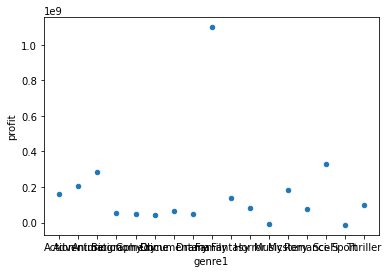

In [58]:

df_test.plot.scatter('genre1' , 'profit')

In [69]:
'sunghursh' in df_merge['movie'].values


False